# Stock Portfolio Visualization

The purpose of this project is to build a portfolio visualisation tool which allows portfolio managers to see the asset allocation in their portfolio

In [4]:
#Import necessary libraries
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
tickers = ["AAPL", "TSLA", "META", "NVDA", "AMZN", "GOOG"]
amounts = [7, 5, 12, 16, 2, 4]
prices = []
total = []

In [6]:
for ticker in tickers:
    try:
        # Retrieve data from Yahoo Finance using yfinance
        df = yf.download(ticker, start="2019-08-01", end=dt.datetime.now().strftime('%Y-%m-%d'))
        
        # Check if DataFrame is empty
        if df.empty:
            raise ValueError(f"No data retrieved for {ticker}")
        
        # Extract the latest closing price
        price = df['Close'][-1]
        prices.append(price)
        
        # Find the index of the current ticker
        index = tickers.index(ticker)
        
        # Compute total value based on price and amount
        total.append(price * amounts[index])
    
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed
C:\Users\steph\AppData\Local\Temp\ipykernel_26796\769454281.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = df['Close'][-1]
[*********************100%***********************]  1 of 1 completed
C:\Users\steph\AppData\Local\Temp\ipykernel_26796\769454281.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = df['Close'][-1]
[*********************100%***********************]  1 of 1 completed
C:\Users\steph\AppData\Local\Temp\ipykernel_26796\769454281.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. 

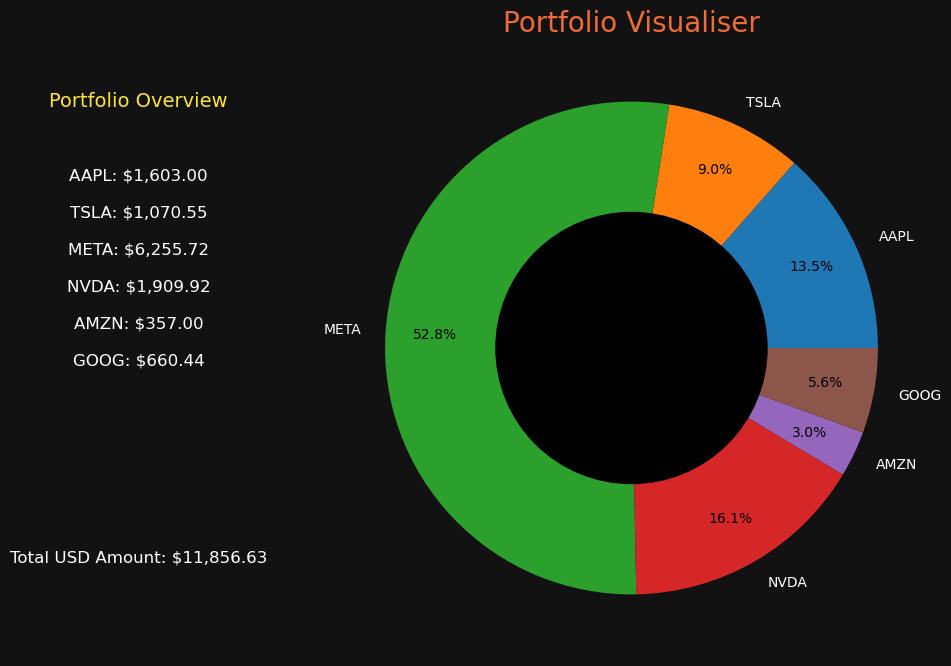

In [62]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_facecolor("black")
ax.figure.set_facecolor("#121212")
ax.tick_params(axis="x", color="white")
ax.tick_params(axis="y", color="white")
ax.set_title("Portfolio Visualiser", color="#EF6C35", fontsize=20)

# Pie chart
patches, texts, autotexts = ax.pie(total, labels=tickers, autopct="%1.1f%%", pctdistance=0.8)
[text.set_color("white") for text in texts]

# Adding a white circle at the center
my_circle = plt.Circle((0, 0), 0.55, color="black")
plt.gca().add_artist(my_circle)

# Adding additional text
ax.text(-2, 1, "Portfolio Overview", fontsize=14, color="#FFE536", verticalalignment="center", horizontalalignment="center")
ax.text(-2, -0.85, f"Total USD Amount: ${sum(total):,.2f}", fontsize=12, color="white", verticalalignment="center", horizontalalignment="center")

# Adding ticker information
counter = 0.15
for ticker in tickers:
    ax.text(-2, 0.85 - counter, f"{ticker}: ${total[tickers.index(ticker)]:,.2f}", fontsize=12, color="white", verticalalignment="center", horizontalalignment="center")
    counter += 0.15